Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import scipy.stats as stats

>pandas is used for handling and manipulating data in tabular format (DataFrame).

>scipy.stats provides statistical functions, including chi2_contingency for the Chi-Square test.

Step 2: Create a Sample Dataset

In [5]:
data = {'Gender': ['Male']*100 + ['Female']*100,
        'Purchase': ['Buy']*40 + ['Not Buy']*60 + ['Buy']*50 + ['Not Buy']*50}

df = pd.DataFrame(data)
df.head()

,Gender,Purchase
0,Male,Buy
1,Male,Buy
2,Male,Buy
3,Male,Buy
4,Male,Buy


>A dictionary data is created with two categorical columns:
'Gender': Contains 100 'Male' and 100 'Female' entries.
'Purchase':For males: 40 bought, 60 did not buy.
For females: 50 bought, 50 did not buy.

>The pd.DataFrame(data) converts the dictionary into a Pandas DataFrame, making it easier to analyze.



Step 3: Create a Contingency Table

In [9]:
contingency_table = pd.crosstab(df['Gender'], df['Purchase'])
print(contingency_table)

Purchase  Buy  Not Buy
Gender                
Female     50       50
Male       40       60


>pd.crosstab() creates a contingency table, summarizing how the two categorical variables are distributed.

Step 4: Chi-Square Statistical Test


In [22]:
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic = {chi2_stat}")
print(f"P-Value = {p_val}")
print(f"Degrees of Freedom = {dof}")
print(f"Expected Frequencies Table:\n{expected}")

if p_val < 0.05:
    print("\nReject H₀: Gender and Purchase are dependent.")
else:
    print("\nFail to reject H₀: Gender and Purchase are independent.")

Chi-Square Statistic = 1.6363636363636362
P-Value = 0.20082512269514174
Degrees of Freedom = 1
Expected Frequencies Table:
[[45. 55.]
 [45. 55.]]

Fail to reject H₀: Gender and Purchase are independent.


>stats.chi2_contingency(contingency_table) performs the Chi-Square Test and returns:
1. chi2: The Chi-Square statistic (measures deviation from expected values).
2. p: The p-value (determines statistical significance).
3. dof: Degrees of freedom (calculated as (rows - 1) * (columns - 1)).
4. expected: A table of expected frequencies if the variables were independent.

>Interpretation
Since the p-value (0.2008) is greater than 0.05, we fail to reject the null hypothesis (H₀).This means there is no significant relationship between Gender and Purchase Decision.
In a machine learning context, "Gender" may not be an important feature for predicting Purchase behavior.

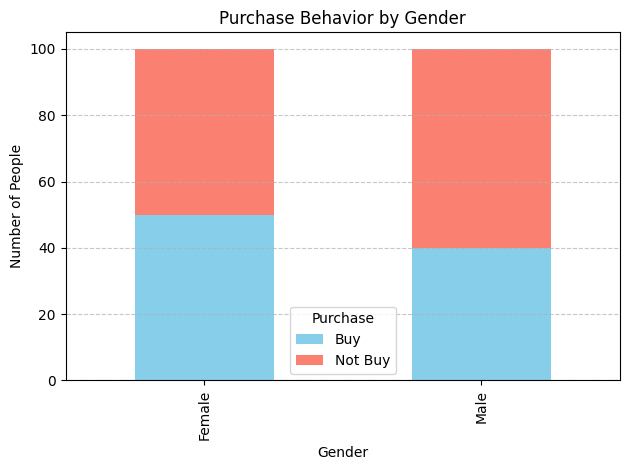

In [13]:
import matplotlib.pyplot as plt

# Step 6: Plotting the Contingency Table as a Bar Plot
contingency_table.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Purchase Behavior by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Purchase')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


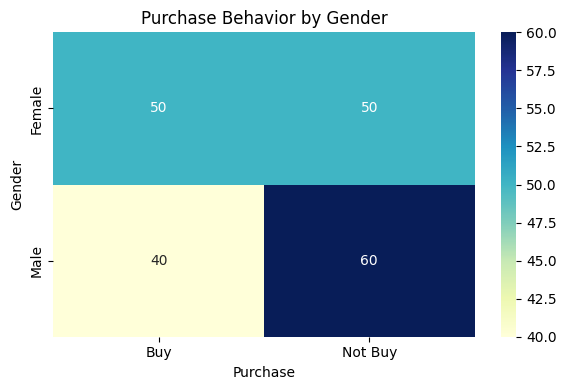

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Heatmap of Contingency Table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title("Purchase Behavior by Gender")
plt.xlabel("Purchase")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()


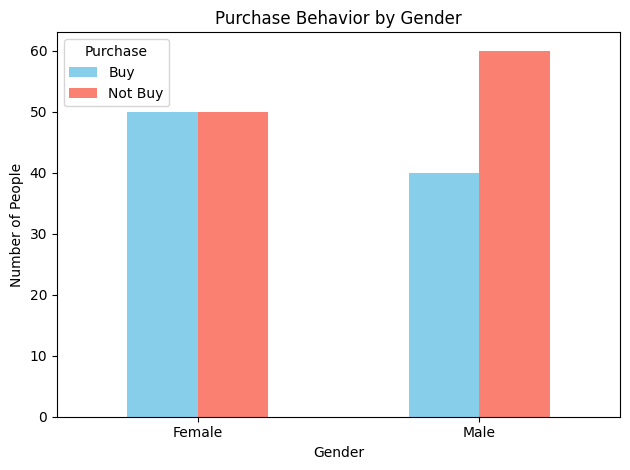

In [17]:
contingency_table.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

plt.title('Purchase Behavior by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.xticks(rotation=0)  # Set x-axis labels (Male, Female) to horizontal
plt.legend(title='Purchase')
plt.tight_layout()
plt.show()



 Step 1: Import Libraries & Create Dataset

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Create sample dataset
data = {
    'Gender': ['Male']*100 + ['Female']*100,
    'Purchase': ['Buy']*40 + ['Not Buy']*60 + ['Buy']*50 + ['Not Buy']*50
}

df = pd.DataFrame(data)
df.head()


,Gender,Purchase
0,Male,Buy
1,Male,Buy
2,Male,Buy
3,Male,Buy
4,Male,Buy


Step 2: Encode Categorical Variables

In [25]:
# Initialize Label Encoders
le_gender = LabelEncoder()
le_purchase = LabelEncoder()

# Apply Encoding
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])   # Male=1, Female=0
df['Purchase_encoded'] = le_purchase.fit_transform(df['Purchase'])  # Buy=0, Not Buy=1

df.head()


,Gender,Purchase,Gender_encoded,Purchase_encoded
0,Male,Buy,1,0
1,Male,Buy,1,0
2,Male,Buy,1,0
3,Male,Buy,1,0
4,Male,Buy,1,0


Step 3: Define Feature and Target


In [27]:
X = df[['Gender_encoded']]  # Independent feature(s)
y = df['Purchase_encoded']  # Dependent/Target variable

>X contains the input features for selection.

>y contains the target values that we want to predict.

 Step 4: Apply Chi-Square Test for Feature Selection

In [28]:
# Apply SelectKBest with chi2
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)

# Fetch Chi-Square scores
chi2_scores = chi2_selector.scores_

# Display scores
for feature, score in zip(X.columns, chi2_scores):
    print(f"Feature: {feature}, Chi-Square Score: {score:.4f}")


Feature: Gender_encoded, Chi-Square Score: 1.0101


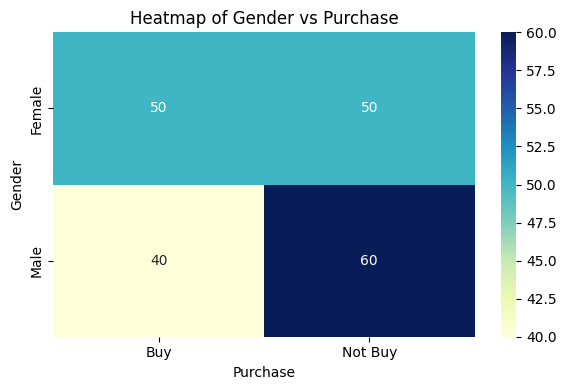

In [30]:
import seaborn as sns

# Plot Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Gender vs Purchase")
plt.xlabel("Purchase")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()
